In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd

series=pd.read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)


In [4]:
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

## Plot ACF and PACF 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

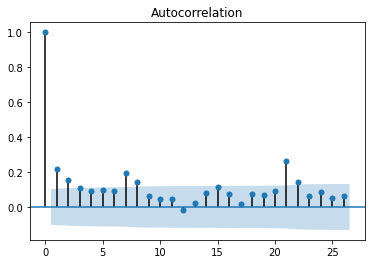

In [9]:
_ = plot_acf(series)

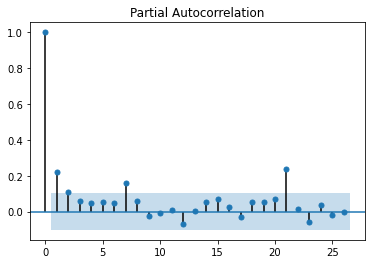

In [10]:
_ = plot_pacf(series)

## Decompose a timeseries

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

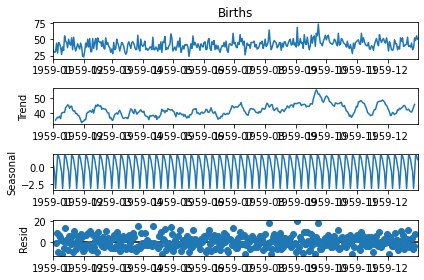

In [14]:
result = seasonal_decompose(series, model='additive')  # model can be multiplicative
_ = result.plot()

## ADF test for stationarity

In [15]:
#Augmented Dickey-Fuller (ADF) Unit Root test for stationary
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


#when p-value<0.05, it's stationary

## Select ARMA order

``` python
from statsmodels.tsa.stattools import arma_order_select_ic=
arma_order_select_ic(time_series,max_ar=4, max_ma=2, ic='aic')
```

## ARIMA Model

``` python
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(series, order=(3,1,2))
```

In case we want to use auto_arima
``` python
!pip install pmdarima
import pmdarima as pm

model = pm.auto_arima(time_series, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())



For diagnostics:
model.plot_diagnostics()
plt.show()
```

## Generating AR or MA samples

``` python
from statsmodels.tsa.arima_process import arma_generate_sample
arma_generate_sample(ar=[1,0],ma=[1,1],nsample=100)
```

## Testing Autocorrelation between residuals of model

```python
#Ljung–Box test for autocorerlation: Null: uncorrelated
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid(),lags=10)

```

## VAR model

```python

from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(2)
print(model_fit.summary())

```